In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

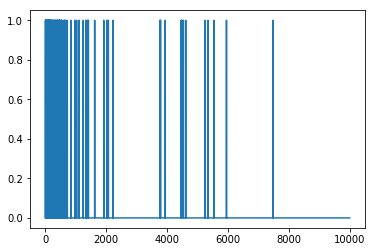

In [2]:
#Mult hot encoding
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

plt.plot(train_data[0])

In [3]:
#Create Baseline model
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(10000, )),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)   
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy']
                      )

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [4]:
#Fit baseline model
baseline_history = baseline_model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=2
)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.4322 - acc: 0.8253 - binary_crossentropy: 0.4322 - val_loss: 0.3076 - val_acc: 0.8810 - val_binary_crossentropy: 0.3076
Epoch 2/20
 - 4s - loss: 0.2256 - acc: 0.9176 - binary_crossentropy: 0.2256 - val_loss: 0.2838 - val_acc: 0.8865 - val_binary_crossentropy: 0.2838
Epoch 3/20
 - 4s - loss: 0.1692 - acc: 0.9403 - binary_crossentropy: 0.1692 - val_loss: 0.2962 - val_acc: 0.8830 - val_binary_crossentropy: 0.2962
Epoch 4/20
 - 4s - loss: 0.1364 - acc: 0.9534 - binary_crossentropy: 0.1364 - val_loss: 0.3257 - val_acc: 0.8766 - val_binary_crossentropy: 0.3257
Epoch 5/20
 - 4s - loss: 0.1147 - acc: 0.9612 - binary_crossentropy: 0.1147 - val_loss: 0.3554 - val_acc: 0.8712 - val_binary_crossentropy: 0.3554
Epoch 6/20
 - 4s - loss: 0.0947 - acc: 0.9710 - binary_crossentropy: 0.0947 - val_loss: 0.3908 - val_acc: 0.8672 - val_binary_crossentropy: 0.3908
Epoch 7/20
 - 4s - loss: 0.0776 - acc: 0.9768 - binary_crossentropy:

In [5]:
#Create smaller model
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(10000, )),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'binary_crossentropy']
)

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [6]:
#Fit smaller model
smaller_history = smaller_model.fit(
    train_data,
    train_labels,
    epochs= 20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=2
)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.5436 - acc: 0.8002 - binary_crossentropy: 0.5436 - val_loss: 0.4218 - val_acc: 0.8647 - val_binary_crossentropy: 0.4218
Epoch 2/20
 - 3s - loss: 0.3320 - acc: 0.8982 - binary_crossentropy: 0.3320 - val_loss: 0.3274 - val_acc: 0.8817 - val_binary_crossentropy: 0.3274
Epoch 3/20
 - 3s - loss: 0.2514 - acc: 0.9180 - binary_crossentropy: 0.2514 - val_loss: 0.2940 - val_acc: 0.8880 - val_binary_crossentropy: 0.2940
Epoch 4/20
 - 3s - loss: 0.2082 - acc: 0.9315 - binary_crossentropy: 0.2082 - val_loss: 0.2848 - val_acc: 0.8874 - val_binary_crossentropy: 0.2848
Epoch 5/20
 - 3s - loss: 0.1800 - acc: 0.9421 - binary_crossentropy: 0.1800 - val_loss: 0.2867 - val_acc: 0.8842 - val_binary_crossentropy: 0.2867
Epoch 6/20
 - 3s - loss: 0.1586 - acc: 0.9486 - binary_crossentropy: 0.1586 - val_loss: 0.2886 - val_acc: 0.8851 - val_binary_crossentropy: 0.2886
Epoch 7/20
 - 3s - loss: 0.1415 - acc: 0.9557 - binary_crossentropy:

In [7]:
#Create Bigger model
bigger_model = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(10000, )),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'binary_crossentropy']
)

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [8]:
#Fit bigger model
bigger_history = bigger_model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=2
)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 12s - loss: 0.3542 - acc: 0.8472 - binary_crossentropy: 0.3542 - val_loss: 0.2968 - val_acc: 0.8804 - val_binary_crossentropy: 0.2968
Epoch 2/20
 - 11s - loss: 0.1439 - acc: 0.9466 - binary_crossentropy: 0.1439 - val_loss: 0.3514 - val_acc: 0.8662 - val_binary_crossentropy: 0.3514
Epoch 3/20
 - 11s - loss: 0.0497 - acc: 0.9855 - binary_crossentropy: 0.0497 - val_loss: 0.4267 - val_acc: 0.8676 - val_binary_crossentropy: 0.4267
Epoch 4/20
 - 11s - loss: 0.0078 - acc: 0.9992 - binary_crossentropy: 0.0078 - val_loss: 0.5773 - val_acc: 0.8688 - val_binary_crossentropy: 0.5773
Epoch 5/20
 - 11s - loss: 8.8726e-04 - acc: 1.0000 - binary_crossentropy: 8.8726e-04 - val_loss: 0.6654 - val_acc: 0.8695 - val_binary_crossentropy: 0.6654
Epoch 6/20
 - 11s - loss: 2.5539e-04 - acc: 1.0000 - binary_crossentropy: 2.5539e-04 - val_loss: 0.7048 - val_acc: 0.8690 - val_binary_crossentropy: 0.7048
Epoch 7/20
 - 11s - loss: 1.5576e-04 - acc: 1.

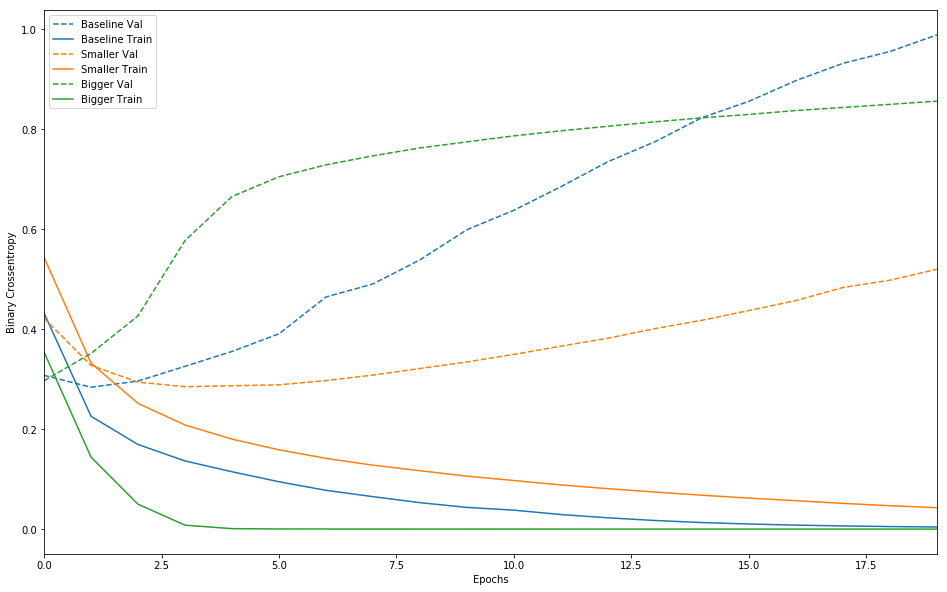

In [9]:
#Plot learning in 3 models
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_' + key], '--', label=name.title() + ' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(), label=name.title() + ' Train')
        
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()
    plt.xlim([0, max(history.epoch)])
    
plot_history([
    ('baseline', baseline_history),
    ('smaller', smaller_history),
    ('bigger', bigger_history)    
])
    

In [10]:
#Solve overfitting by l2 regularization
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(10000, )),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'binary_crossentropy']
)

l2_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [11]:
l2_model_history = l2_model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=2
)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.5502 - acc: 0.7698 - binary_crossentropy: 0.5114 - val_loss: 0.3982 - val_acc: 0.8762 - val_binary_crossentropy: 0.3586
Epoch 2/20
 - 3s - loss: 0.3159 - acc: 0.9072 - binary_crossentropy: 0.2717 - val_loss: 0.3356 - val_acc: 0.8874 - val_binary_crossentropy: 0.2879
Epoch 3/20
 - 3s - loss: 0.2588 - acc: 0.9276 - binary_crossentropy: 0.2087 - val_loss: 0.3352 - val_acc: 0.8869 - val_binary_crossentropy: 0.2832
Epoch 4/20
 - 3s - loss: 0.2319 - acc: 0.9397 - binary_crossentropy: 0.1784 - val_loss: 0.3443 - val_acc: 0.8832 - val_binary_crossentropy: 0.2899
Epoch 5/20
 - 3s - loss: 0.2172 - acc: 0.9459 - binary_crossentropy: 0.1613 - val_loss: 0.3577 - val_acc: 0.8802 - val_binary_crossentropy: 0.3009
Epoch 6/20
 - 4s - loss: 0.2040 - acc: 0.9520 - binary_crossentropy: 0.1466 - val_loss: 0.3713 - val_acc: 0.8772 - val_binary_crossentropy: 0.3134
Epoch 7/20
 - 4s - loss: 0.1969 - acc: 0.9539 - binary_crossentropy:

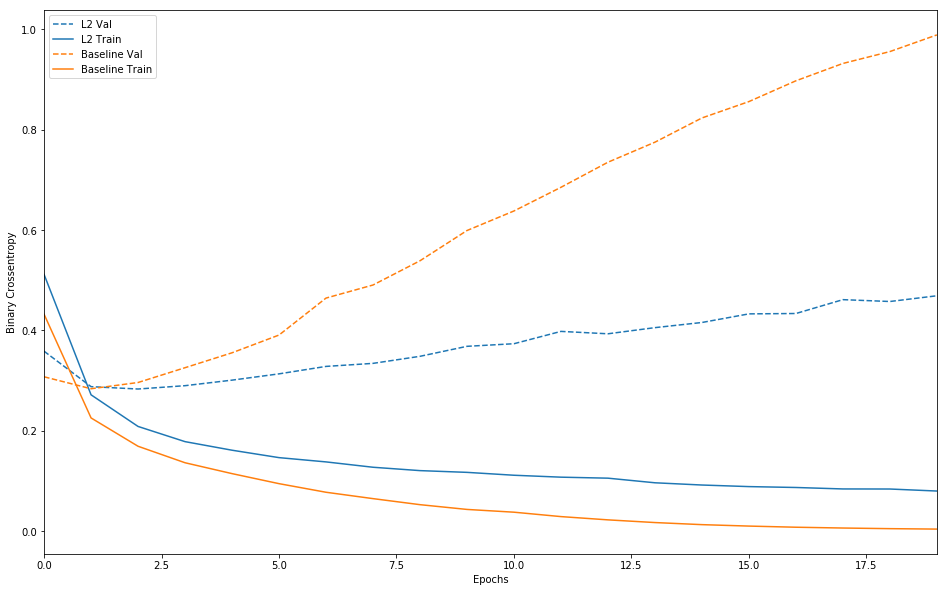

In [12]:
plot_history({
    ('baseline', baseline_history),
    ('l2', l2_model_history)
})

In [13]:
#Solve overgitting by dropout reguralization
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(10000, )),
    keras.layers.Dropout(.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'binary_crossentropy']
)

dpt_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                160016    
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [14]:
dpt_model_history = dpt_model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=2
)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.6069 - acc: 0.6670 - binary_crossentropy: 0.6069 - val_loss: 0.4597 - val_acc: 0.8574 - val_binary_crossentropy: 0.4597
Epoch 2/20
 - 3s - loss: 0.4451 - acc: 0.8087 - binary_crossentropy: 0.4451 - val_loss: 0.3380 - val_acc: 0.8806 - val_binary_crossentropy: 0.3380
Epoch 3/20
 - 3s - loss: 0.3486 - acc: 0.8657 - binary_crossentropy: 0.3486 - val_loss: 0.2876 - val_acc: 0.8867 - val_binary_crossentropy: 0.2876
Epoch 4/20
 - 4s - loss: 0.2932 - acc: 0.8932 - binary_crossentropy: 0.2932 - val_loss: 0.2748 - val_acc: 0.8883 - val_binary_crossentropy: 0.2748
Epoch 5/20
 - 3s - loss: 0.2494 - acc: 0.9134 - binary_crossentropy: 0.2494 - val_loss: 0.2758 - val_acc: 0.8876 - val_binary_crossentropy: 0.2758
Epoch 6/20
 - 3s - loss: 0.2146 - acc: 0.9240 - binary_crossentropy: 0.2146 - val_loss: 0.2866 - val_acc: 0.8864 - val_binary_crossentropy: 0.2866
Epoch 7/20
 - 3s - loss: 0.1923 - acc: 0.9323 - binary_crossentropy:

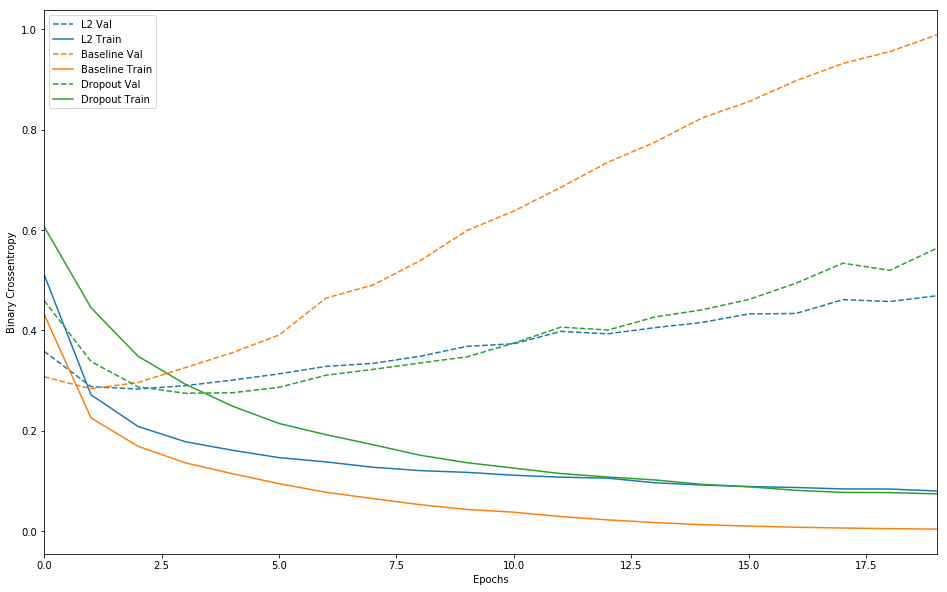

In [15]:
plot_history({
    ('baseline', baseline_history),
    ('l2', l2_model_history),
    ('Dropout', dpt_model_history)
})